In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data/hotel_bookings.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(30)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,4/22/2015


In [5]:
# perform data cleaning

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['agent','company'],axis=1,inplace=True)

In [9]:
df.country.value_counts().index[0]

'PRT'

In [10]:
df.country.fillna(df.country.value_counts().index[0],inplace=True)

C:\Users\modern14\AppData\Local\Temp\ipykernel_12484\3083261344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.country.fillna(df.country.value_counts().index[0],inplace=True)


In [11]:
df.fillna(0,inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
filter1 = (df.children==0) & (df.adults==0) & (df.babies==0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
df.shape

(119390, 30)

In [17]:
data.shape

(119210, 30)

In [18]:
# where do the guests come from

In [19]:
data.is_canceled.unique()

array([0, 1])

In [20]:
data[data.is_canceled==0].country.value_counts().sum()

np.int64(75011)

In [21]:
len(data[data.is_canceled==0])

75011

In [22]:
data[data.is_canceled==0].country.value_counts()/75011

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
KIR    0.000013
ATF    0.000013
TJK    0.000013
SLE    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [23]:
country_wise_data=data[data.is_canceled==0].country.value_counts().reset_index()

In [24]:
country_wise_data.columns=['country','no_of_guests']

In [25]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [26]:
!pip install chart_studio


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [28]:
country_wise_data.columns

Index(['country', 'no_of_guests'], dtype='object')

In [29]:
map_guests=px.choropleth(country_wise_data,
              locations=country_wise_data.country,
              color=country_wise_data.no_of_guests,
              hover_name=country_wise_data.country,
              title='home country of guests')

In [30]:
map_guests.show(renderer='colab')

In [31]:
# how much do guests pay for a room per night

In [32]:
data2=data[data.is_canceled==0]

In [33]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [34]:
data2.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,9/7/2017


Text(0, 0.5, 'price in eur')

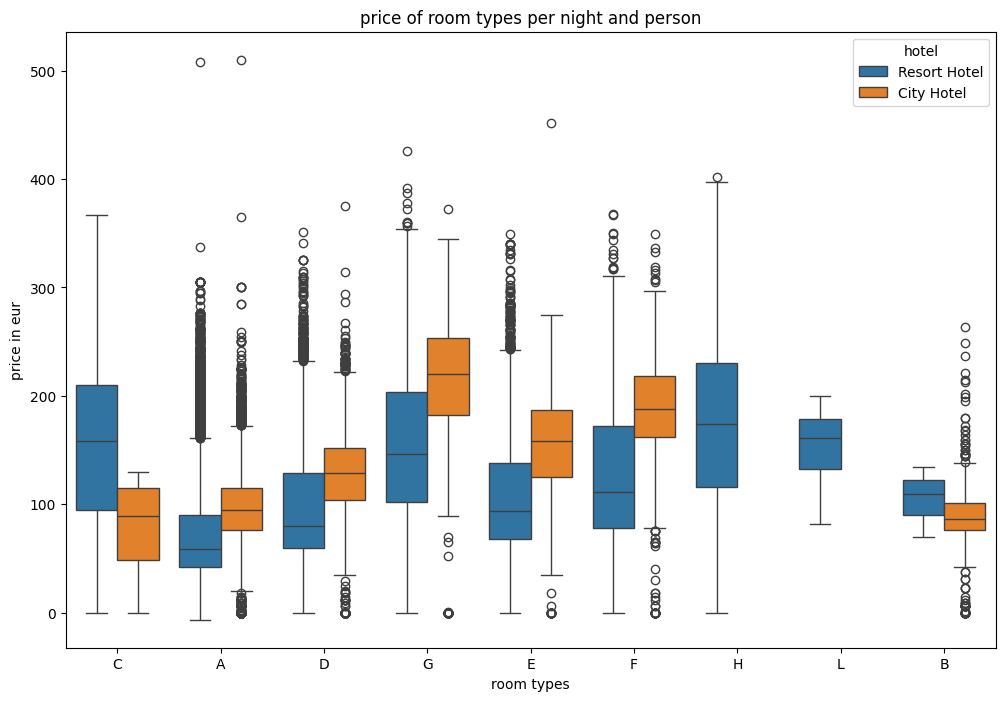

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)

plt.title('price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price in eur')

In [36]:
# which are the busiest month

In [37]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [38]:
data_resort=data[(data.hotel=='Resort Hotel') & (data.is_canceled==0)]
data_city=data[(data.hotel=='City Hotel') & (data.is_canceled==0)]

In [39]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [40]:
rush_resort=data_resort.arrival_date_month.value_counts().reset_index()
rush_resort.columns=['month','no_of_guest']
rush_resort

,month,no_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [41]:
rush_city=data_city.arrival_date_month.value_counts().reset_index()
rush_city.columns=['month','no_of_guest']
rush_city

,month,no_of_guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [42]:
final_rush=rush_resort.merge(rush_city,on='month')

In [43]:
final_rush.columns=['month','no_of_guest_in_resort','no_of_guest_in_city']

In [44]:
final_rush

,month,no_of_guest_in_resort,no_of_guest_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [45]:
!pip install sorted-months-weekdays
!pip install sort_dataframebY_monthorweek

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3238 sha256=067cc912165ad7a60af39feabbd9d1a5a7456907872b202b41b9765b8b1a0170
  Stored in directory: c:\users\modern14\appdata\local\pip\cache\wheels\4d\4f\f5\d9e3e3e60d80b3cdc2f69dfcf0d4bc45257abdea94f2035dbb
Successfully built sorted-months-weekdays



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sort_dataframebY_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3437 sha256=018c3133ce016a3d17dcb1fc29fd4aa58d0784b49729a9d66394ce7ca71f67cf
  Stored in directory: c:\users\modern14\appdata\local\pip\cache\wheels\ac\4c\ca\134c7282a08e7e2b149b1da1975c6686a262c15a92b78adcc7
Successfully built sort_dataframebY_monthorweek



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import sort_dataframeby_monthorweek as sd

In [47]:
finals_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [48]:
final_rush.columns

Index(['month', 'no_of_guest_in_resort', 'no_of_guest_in_city'], dtype='object')

In [49]:
fig=px.line(final_rush,x='month',y=['no_of_guest_in_resort', 'no_of_guest_in_city'])
fig.show(renderer='colab')

In [50]:
# which month has highest adr

In [51]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

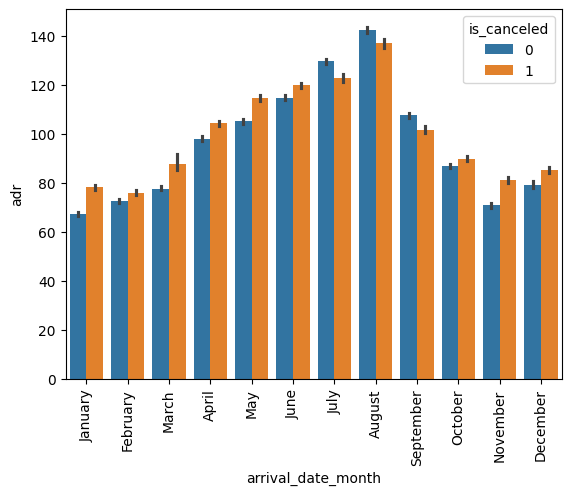

In [52]:
sns.barplot(x='arrival_date_month',y='adr',data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

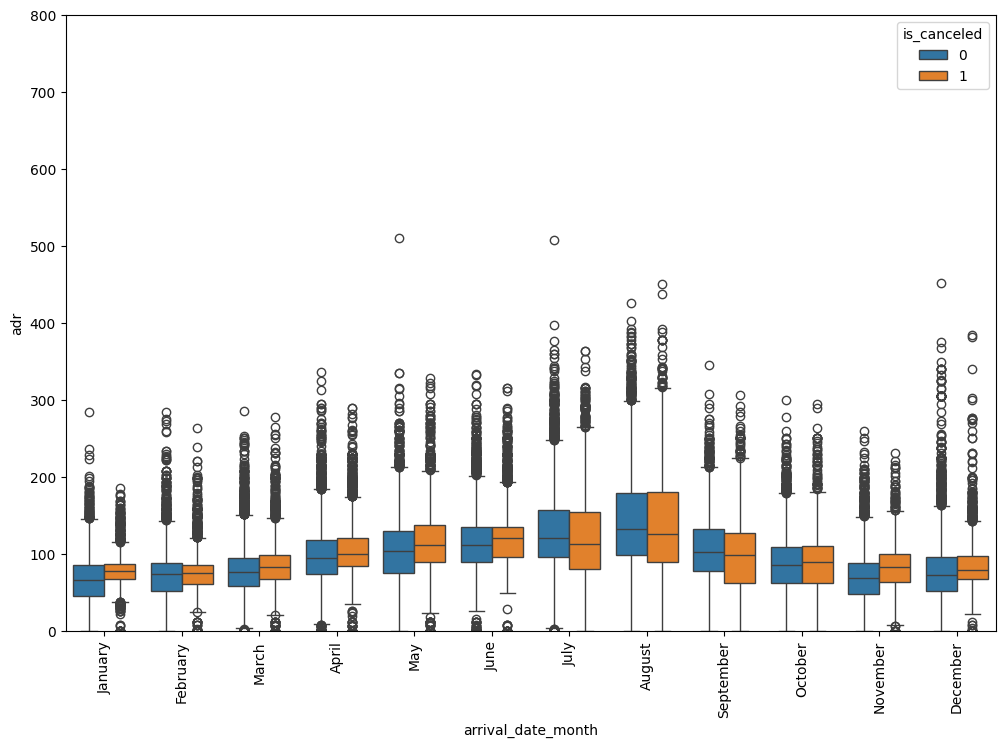

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')

plt.ylim(0,800)
plt.show()

In [54]:
# analyse whether bookings were made only for weekdays or for weekends or for both

In [55]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [56]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data2.stays_in_week_nights.unique()

array([ 0,  1,  2,  4,  5, 10, 11,  3,  8,  6,  7,  9, 33, 12, 20, 15, 21,
       13, 30, 42, 50, 25, 14, 17, 32, 16, 40, 19, 26, 34, 18])

In [58]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [59]:
def week_function(row):
  feature1='stays_in_weekend_nights'
  feature2='stays_in_week_nights'

  if row[feature2] == 0 and row[feature1] > 0:
    return 'stay_just_weekend'

  if row[feature2] > 0 and row[feature1] == 0:
    return 'stay_just_weekdays'

  if row[feature2] > 0 and row[feature1] > 0:
    return 'stay_both_weekdays_weekend'

  else:
    return 'undefined_data'

In [60]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)

In [61]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [62]:
data2.weekend_or_weekday.value_counts()

weekend_or_weekday
stay_both_weekdays_weekend    37551
stay_just_weekdays            31788
stay_just_weekend              5050
undefined_data                  622
Name: count, dtype: int64

In [63]:
type(sd)

module

In [64]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [65]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday        
April               stay_both_weekdays_weekend    3627
                    stay_just_weekdays            2559
                    stay_just_weekend              344
                    undefined_data                  30
August              stay_both_weekdays_weekend    4929
                    stay_just_weekdays            3137
                    stay_just_weekend              509
                    undefined_data                  49
December            stay_both_weekdays_weekend    1901
                    stay_just_weekdays            2123
                    stay_just_weekend              298
                    undefined_data                  69
February            stay_both_weekdays_weekend    2438
                    stay_just_weekdays            2514
                    stay_just_weekend              360
                    undefined_data                  47
January             stay_both_weekdays_weekend    1550
                  

In [66]:
grouped_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [67]:
grouped_data

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69
3,February,2438,2514,360,47
4,January,1550,2125,393,47
5,July,4570,2818,462,57
6,June,3241,2685,433,36
7,March,3151,3060,359,50
8,May,3442,3017,570,74
9,November,2117,2214,261,59


In [68]:
sorted_data=sd.Sort_Dataframeby_Month(grouped_data,'arrival_date_month')

In [69]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [70]:
sorted_data

,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

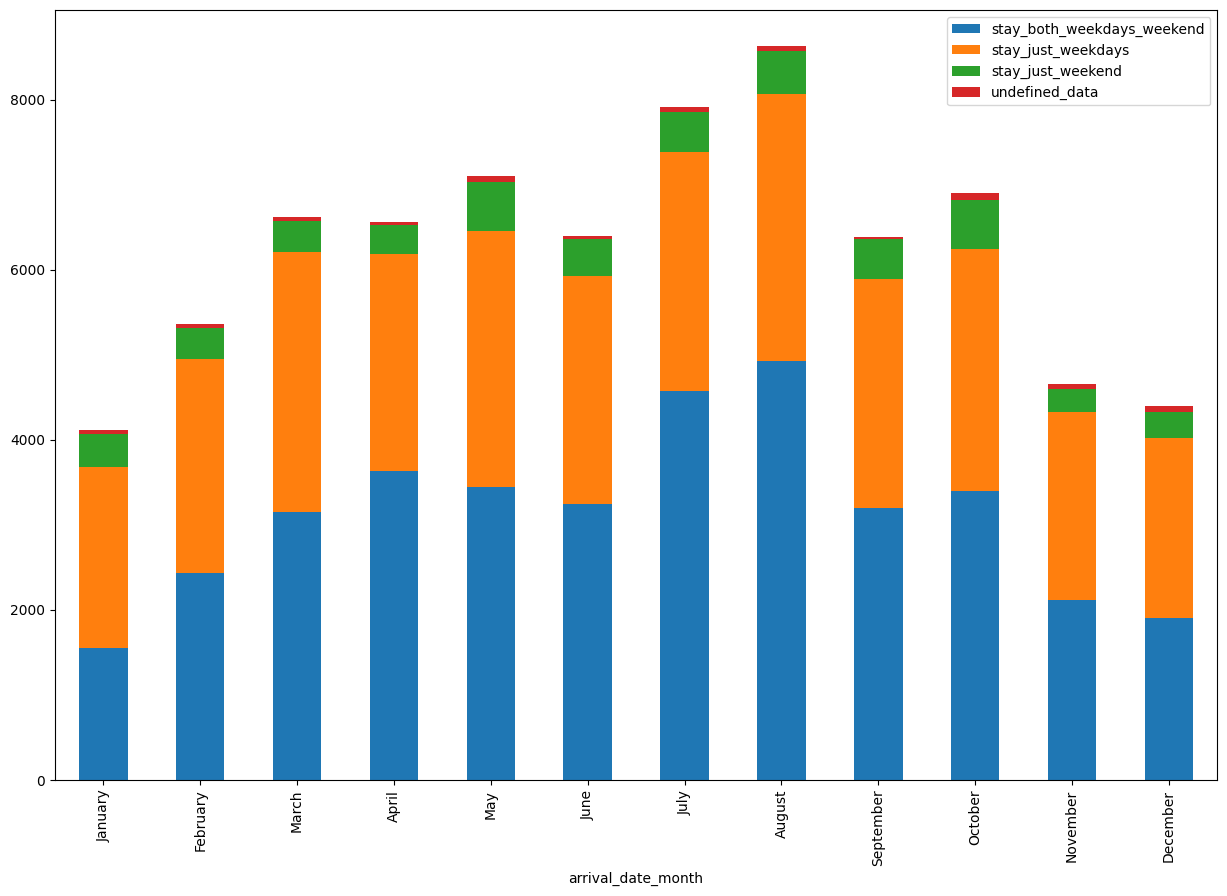

In [71]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [72]:
# how to create some more features

In [73]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [74]:
def family(row):
  if (row.adults>0) and (row.children>0 or row.babies>0):
    return 1
  else:
    return 0

In [75]:
data['is_family']=data.apply(family,axis=1)

In [76]:
data['total_customer']=data.adults+data.babies+data.children

In [77]:
data['total_nights']=data.stays_in_week_nights+data.stays_in_weekend_nights

In [78]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2


In [79]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [80]:
data.deposit_type.unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [81]:
dict1={'No Deposit':0,
       'Non Refund':1,
       'Refundable':0}

In [82]:
data['deposit_given']=data.deposit_type.map(dict1)

In [83]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [84]:
# how to apply feature encoding on the data

In [85]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [86]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [87]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [88]:
cat_features=[col for col in data.columns if data[col].dtype=='object']

In [89]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [90]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [91]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [92]:
data_cat=data[cat_features]

In [93]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [94]:
data.groupby('hotel').is_canceled.mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [95]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [96]:
data_cat['cancellation']=data.is_canceled

In [97]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,1


In [98]:
cols=data_cat.columns

In [99]:
cols=cols[0:-1]

In [100]:
for col in cols:
  dict2=data_cat.groupby(col).cancellation.mean().to_dict()
  data_cat[col]=data_cat[col].map(dict2)

In [101]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.28402,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.28402,0.407864,1.0,0.684211,1


In [102]:
# handle outliers

In [103]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,2,0.0,0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,2,2.0,0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,2,0.0,0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,2,0.0,0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,2,2.0,0,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,2,1.0,0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,2,0.0,0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,2,0.0,0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,2,0.0,0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [104]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [105]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'cancellation', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [106]:
dataframe.drop('cancellation',axis=1,inplace=True)

In [107]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,...,0,0,0,89.00,0,1,0,2.0,1,0


<Axes: xlabel='lead_time', ylabel='Density'>

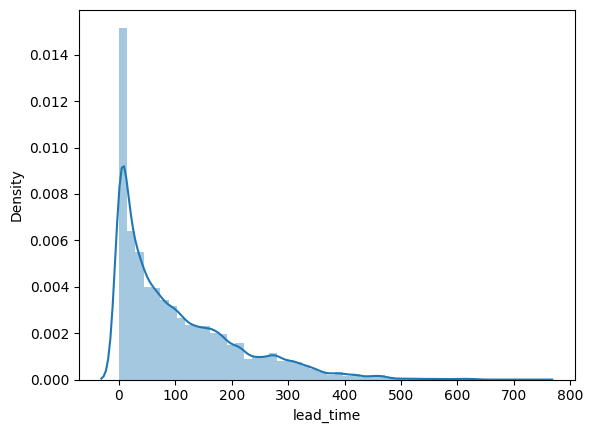

In [108]:
sns.distplot(dataframe.lead_time)

In [109]:
def handle_outliers(col):
  dataframe[col]=np.log1p(dataframe[col])

In [110]:
handle_outliers('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

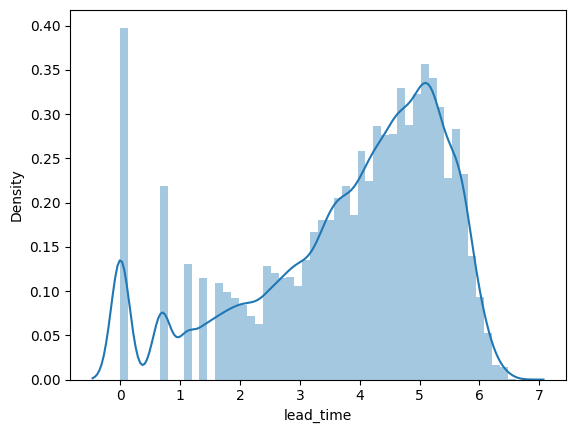

In [111]:
sns.distplot(dataframe.lead_time)

<Axes: xlabel='adr', ylabel='Density'>

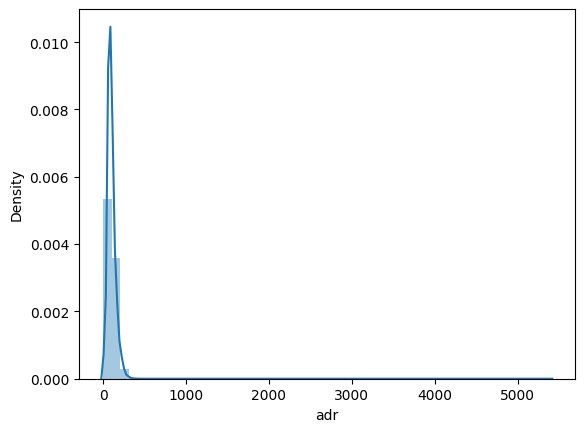

In [112]:
sns.distplot(dataframe.adr)

In [113]:
dataframe[dataframe.adr<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.28402,0.254504,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [114]:
handle_outliers('adr')

In [115]:
dataframe['adr'].isnull().sum()

np.int64(1)

In [116]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<Axes: xlabel='adr', ylabel='Density'>

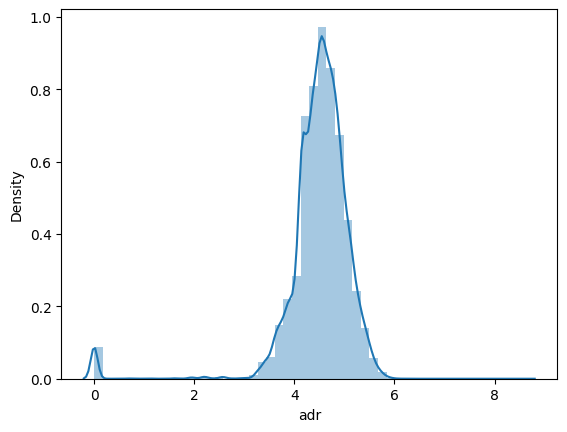

In [117]:
sns.distplot(dataframe.adr.dropna())

In [118]:
# select important features using correlation and univariate analysis

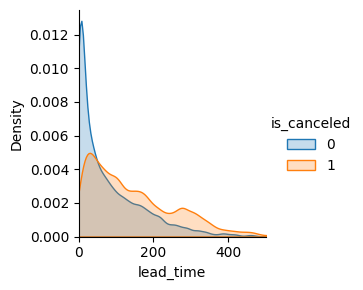

In [119]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [120]:
corr=dataframe.corr()

In [121]:
corr.is_canceled.sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
adults                            0.058182
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_dat

In [122]:
corr.is_canceled.sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_type', 'deposit_given', 'country', 'lead_time',
       'market_segment', 'assigned_room_type', 'distribution_channel', 'hotel',
       'customer_type', 'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'adults', 'days_in_waiting_list', 'meal',
       'total_customer', 'stays_in_week_nights', 'total_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'is_family',
       'babies', 'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [123]:
features_to_drop=['reservation_status','reservation_status_date','arrival_date_year',
                  'arrival_date_week_number','stays_in_weekend_nights','arrival_date_day_of_month']

In [124]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [125]:
dataframe.shape

(119210, 28)

In [126]:
# how to find important features for model building

In [127]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [128]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given               

In [129]:
dataframe.dropna(inplace=True)

In [130]:
x=dataframe.drop('is_canceled',axis=1)

In [131]:
y=dataframe.is_canceled

In [132]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [133]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [134]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [135]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [136]:
cols=x.columns

In [137]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'lead_time', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [138]:
selected_features=cols[feature_sel_model.get_support()]

In [139]:
selected_features

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [140]:
x=x[selected_features]

In [141]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [142]:
# build the ml model

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [145]:
X_train.shape

(89406, 12)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
logreg=LogisticRegression()

In [148]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [149]:
pred=logreg.predict(X_test)

In [150]:
pred

array([0, 0, 0, ..., 0, 1, 0], shape=(29803,))

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
confusion_matrix(y_test,pred)

array([[17200,  1501],
       [ 4700,  6402]])

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(y_test,pred)

0.7919336979498708

In [155]:
# cross validate the model

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
score=cross_val_score(logreg,x,y,cv=10)

In [158]:
score

array([0.77862595, 0.7841624 , 0.78240081, 0.81369013, 0.81486452,
       0.7393675 , 0.74037413, 0.8557168 , 0.8307189 , 0.80276846])

In [159]:
score.mean()

np.float64(0.7942689603930575)

In [160]:
# using multiple algorithms

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [162]:
models=[]

In [163]:
models.append(('LogisticRegression',LogisticRegression()))
models.append(('NaiveBayes',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [164]:
for name,model in models:
  print(name)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)

  from sklearn.metrics import confusion_matrix

  cm=confusion_matrix(y_test,pred)
  print(cm)

  from sklearn.metrics import accuracy_score

  acc=accuracy_score(y_test,pred)
  print(acc)
  print('\n')

LogisticRegression
[[17200  1501]
 [ 4700  6402]]
0.7919336979498708


NaiveBayes
[[ 6462 12239]
 [  636 10466]]
0.5679965104184143


RandomForest
[[17145  1556]
 [ 2787  8315]]
0.8542764151259941


DecisionTree
[[15940  2761]
 [ 2646  8456]]
0.8185753112102808


KNN
[[16665  2036]
 [ 3413  7689]]
0.8171660571083448


